### ETAS: El Salvador 2016
#### 24 November 2016, 18:43:48 m=7.8
lon: 11.960
lat: -88.835


In [38]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

#
# on a fresh linux install... (can we script this?)
# stuff we have to do besides just clone this:
# pip install geopy
# conda install basemap
# pip install geographiclib
# conda install -c ioos rtree


In [40]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
# USGS:
# italy
#lat0 = 42.934
#lon0 = 13.043
#t0   = dtm.datetime(2016, 10, 26, 19, 18, 8, tzinfo=pytz.timezone('UTC'))
#m0   = 6.1
#
# newest event:
# 2016-11-13 11:02:56
t0 = dtm.datetime(2016, 11, 13, 11, 2, 56, tzinfo=pytz.timezone('UTC'))
t_ms = t0
to_dt = dtm.datetime.now(pytz.utc)
#Location
lat0 = 11.96
lon0 = -88.835
m0 = 7.0
d_lat=5.
d_lon=5.
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
#to_dt = t0-dtm.timedelta(hours=2)
#to_dt = dtm.datetime.now(pytz.utc)
#

In [41]:
# date_range = [dtm.datetime.now(dtm.timezone.utc)-dtm.timedelta(days=3650), dtm.datetime.now(dtm.timezone.utc)]
# #lons = [-124., -115]
# #lats = [31., 37.]

# #lats[1]=35.
# #lons[0] = -120.
# #
# print('lats: {}'.format(lats))
# print('lons: {}'.format(lons))
# print('dates: {}'.format(date_range))

# cc=atp.catfromANSS(lat=lats, lon=lons, dates0=date_range, minMag=2.5)
# print('len(cc): {}'.format(len(cc)))



In [42]:
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':5.}

#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)

#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=nz_cat, **eq_prams)
etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=None, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#
f_path = '/home/myoder/Dropbox/Research/etas/ElSalvador_2016_11/etas_{}'.format(etas.t_now)
f_root = 'etas_ElSlavador_2016_11'

begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-11-27 14:56:56.873292+00:00
fetch and process catalog.
etas_prams:  {'q': 1.5, 'mc': 2.5, 'incat': None, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2016, 11, 25, 14, 56, 56, 873292, tzinfo=<UTC>)], 'd_lambda': 1.76, 'd_tau': 2.28, 'lons': [-93.835, -83.835], 'p': 1.1, 'D_fract': 1.5, 'fit_factor': 1.0, 'b1': 1.0, 'do_recarray': True, 'b2': 1.5, 'dmstar': 1.0, 'lats': [6.960000000000001, 16.96]}
data handle fetched...
 no file.
R:  <multiprocessing.pool.ApplyResult object at 0x7ffdc41c0f98>
R:  <multiprocessing.pool.ApplyResult object at 0x7ffdc41c0da0>
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 8516], None)
make_etas():
etas_mpp worker xyz_range:  [0, 2500]
begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calcul

In [43]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])

2016-11-25 14:56:56.873292+00:00
1990-01-01 00:00:00+00:00 2016-11-25 14:56:56.873292+00:00 2016-11-25 14:56:56.873292+00:00 2016-11-13 11:02:56+00:00


ms:  (datetime.datetime(2016, 11, 24, 18, 43, 48, 830000), 11.9597, -88.8355, 7.0, 10.34, 736292.7804262731, 54.954087385762456, 997.8404925454946, 2.0021630113650087e-05, 16.595869074375614, 126.65018464658773, 0.0019486750167964611, 1.0, 1.1, 1.5, array([  9.37379299e+07,   6.75770119e+02]), array([[ 0.99031059,  0.13887025],
       [-0.13887025,  0.99031059]]), 175.0) -88.8355 11.9597


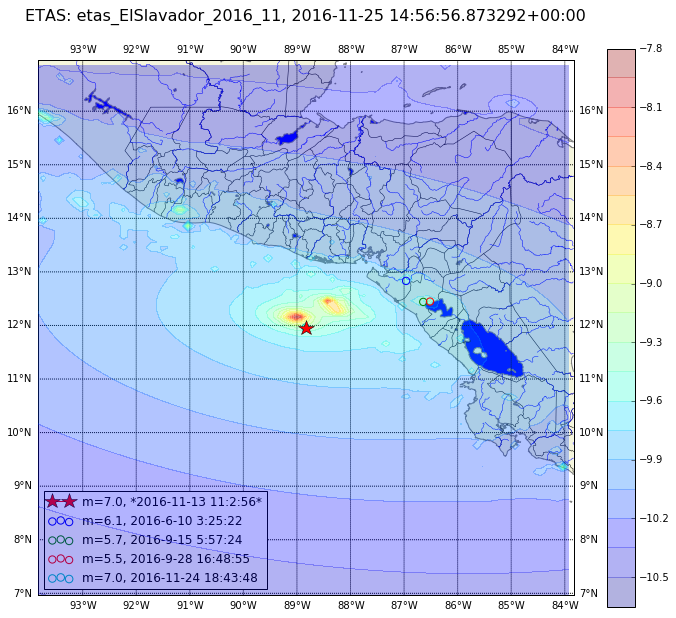

In [44]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

mainshock = etas.catalog[-1]
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])

#print('mm: ', max(etas.catalog['mag']))


#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>t_ms-dtm.timedelta(days=180)]

# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([lon0], [lat0], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, *{}*'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(f_root, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

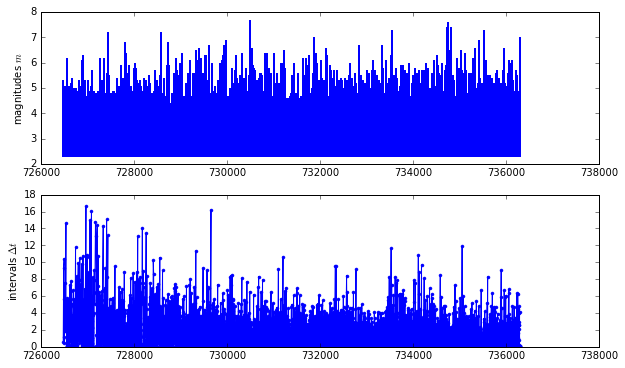

In [45]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')

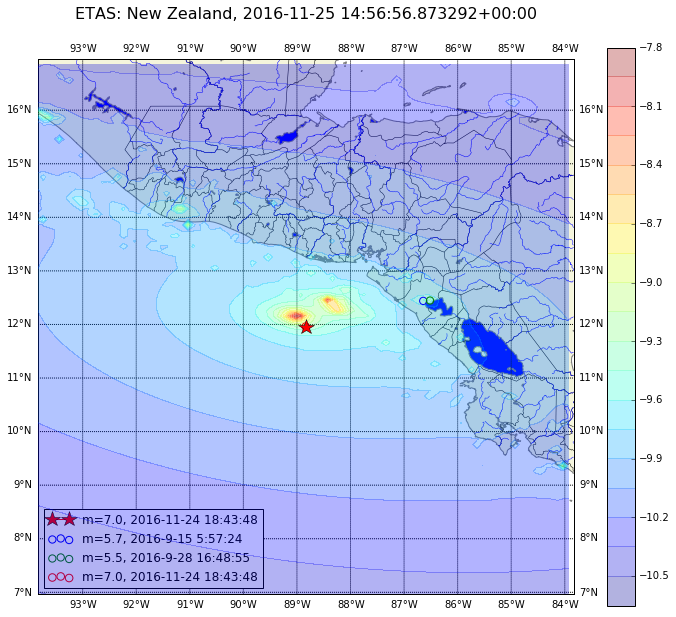

In [46]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, {}'.format(mainshock['mag'], dt_str))
ax.set_title('ETAS: New Zealand, {}\n\n'.format(etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

In [47]:
print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])



['1990-03-25T07:16:06.920000-0600,5.8\n', '1990-03-25T07:22:55.600000-0600,6.2\n', '1990-03-25T15:35:24.440000-0600,5.6\n', '1990-04-03T17:57:00.920000-0500,5.5\n', '1990-04-03T23:19:25.090000-0500,5.6\n', '1991-03-01T11:30:26.050000-0600,6.1\n', '1991-03-16T00:02:10.930000-0600,6.3\n', '1991-09-18T04:48:13.110000-0500,5.7\n', '1992-03-06T19:53:37.760000-0600,6.2\n', '1992-05-30T11:30:01.950000-0500,6.2\n', '1992-08-10T01:09:15.410000-0500,5.6\n', '1992-09-01T19:16:01.690000-0500,7.2\n', '1992-09-01T19:21:05.540000-0500,5.5\n', '1992-09-01T19:31:00.000000-0500,5.5\n', '1992-09-02T13:28:56.590000-0500,5.9\n', '1992-09-05T16:48:12.120000-0500,6.0\n', '1992-09-06T08:12:41.350000-0500,5.5\n', '1992-09-10T10:03:17.750000-0500,5.5\n', '1992-09-13T05:53:32.660001-0500,5.5\n', '1993-06-12T06:15:07.470000-0500,5.9\n', '1993-08-22T05:02:11.210000-0500,5.8\n', '1993-09-02T22:16:07.310000-0500,5.5\n', '1993-09-03T07:35:00.270000-0500,6.8\n', '1993-09-04T03:49:42.330000-0500,5.6\n', '1993-09-10T12:

1

In [48]:
for rw in m6s:
    print(rw)

(datetime.datetime(2016, 9, 15, 5, 57, 24, 330000), 12.44, -86.6423, 5.7, 10.0, 736222.2481982639, 12.302687708123818, 40.38350229842041, 0.001985765701617934, 3.715352290971728, 3.854243606223611, 0.05513229660491453, 1.0, 1.1, 1.5, array([  9.70036583e+07,   7.53864229e+01]), array([[ 0.98935341,  0.1455329 ],
       [-0.1455329 ,  0.98935341]]), 12.0)
(datetime.datetime(2016, 9, 28, 16, 48, 55, 620000), 12.4465, -86.5151, 5.5, 7.61, 736235.70064375, 9.772372209558107, 24.65575276769348, 0.004027827496810462, 2.951209226666387, 2.2521941563465453, 0.092201803750403, 1.0, 1.1, 1.5, array([  9.98284824e+07,   3.05347963e+01]), array([[ 0.98934077,  0.14561884],
       [-0.14561884,  0.98934077]]), 9.0)
(datetime.datetime(2016, 11, 24, 18, 43, 48, 830000), 11.9597, -88.8355, 7.0, 10.34, 736292.7804262731, 54.954087385762456, 997.8404925454946, 2.0021630113650087e-05, 16.595869074375614, 126.65018464658773, 0.0019486750167964611, 1.0, 1.1, 1.5, array([  9.37379299e+07,   6.75770119e+02])

In [50]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))), 
                kml_contours_bottom=.25, kml_contours_top=1.0)
etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)


kml bottom, top:  9 19


In [ ]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [ ]:
#print(etas.mc, etas.mc_etas)

In [ ]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [ ]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


In [ ]:
test_cat = atp.catfromANSS(lat=lats, lon=lons, minMag=1.5,
                           dates0=[dtm.datetime(1990,1,1, tzinfo=pytz.utc), dtm.datetime.now(pytz.utc)])


plt.figure()
plt.clf()
#plt.plot(test_cat['lon'], test_cat['lat'], '.')
print(test_cat[-5:])
print(max(test_cat['event_date']))

plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(test_cat['lon'], test_cat['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(test_cat['mag']))], numpy.arange(1,len(test_cat)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [ ]:
#test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
                              date_to=dtm.datetime.now(atp.tzutc))